In [5]:
%run ./reports_config.py

In [6]:
from report import draw_score_heatmap, draw_score_parallel_coord, draw_score_stripplot, prepare_results, render_summary
from report.config import *
from report.util import create_file, display

# Comparisons

## Compare custom runs

Here comparing results for one fold

In [8]:
import glob

runs = dict(
    ref_1h=dict(
        ref=True,
        framework='stable_RF',
        renamings=renamed_frameworks,
        results_files=glob.glob(f"input/for_plotting_RF_stable.csv")
    )
)
runs

{'ref_1h': {'ref': True,
  'framework': 'stable_RF',
  'renamings': {'constantpredictor_enc': 'constantpredictor'},
  'results_files': []}}

In [4]:
runs_results = {name: prepare_results(run['results_files'], 
                                      renamings={run['framework']: name}) 
                for name, run in runs.items()}

Duplicate entries:
                                             id constraint   result metric  \
task       fold framework                                                    
australian 0    mlr3automl  openml.org/t/146818       test 0.943124    auc   
                mlr3automl  openml.org/t/146818       test 0.951613    auc   

                             mode     version  params     tag  \
task       fold framework                                       
australian 0    mlr3automl  local  0.0.0.9000     nan  stable   
                mlr3automl  local  0.0.0.9000     nan  stable   

                                            utc  duration  models        seed  \
task       fold framework                                                       
australian 0    mlr3automl  2020-09-19T18:08:23      96.1     nan  2650252717   
                mlr3automl  2020-09-19T18:11:22      60.2     nan  4208298211   

                           info      acc      auc  logloss  r2  rmse  
task       

AssertionError: 

In [ ]:
ref_results = next(res for name, res in runs_results.items() if runs[name].get('ref', False))

In [6]:
import pandas as pd

def apply_filter(res, filtr):
    r = res.results
    return r.loc[filtr(r, )]

all_res = pd.concat([apply_filter(res, lambda r: (r.framework==name)&(r.fold==0)) for name, res in runs_results.items()])

In [7]:
draw_score_heatmap('score',
                   results=all_res,
                   type_filter='binary', 
                   metadata=ref_results.metadata,
                   y_sort_by=tasks_sort_by,
                   title=f"Scores ({binary_score_label}) on {results_group} binary classification problems",
                   center=0.5);

KeyError: 'binary'

In [8]:
draw_score_heatmap('score', 
                   results=all_res,
                   type_filter='multiclass', 
                   metadata=ref_results.metadata,
                   y_sort_by=tasks_sort_by,
                   title=f"Scores ({multiclass_score_label}) on {results_group} multi-class classification problems",
                   center=0);

KeyError: 'multiclass'

In [9]:
draw_score_parallel_coord('score',
                          results=all_res,
                          type_filter='binary', 
                          metadata=ref_results.metadata,
                          x_sort_by=tasks_sort_by,
                          ylabel=binary_score_label,
                          legend_loc='lower left',
                         );

KeyError: 'binary'

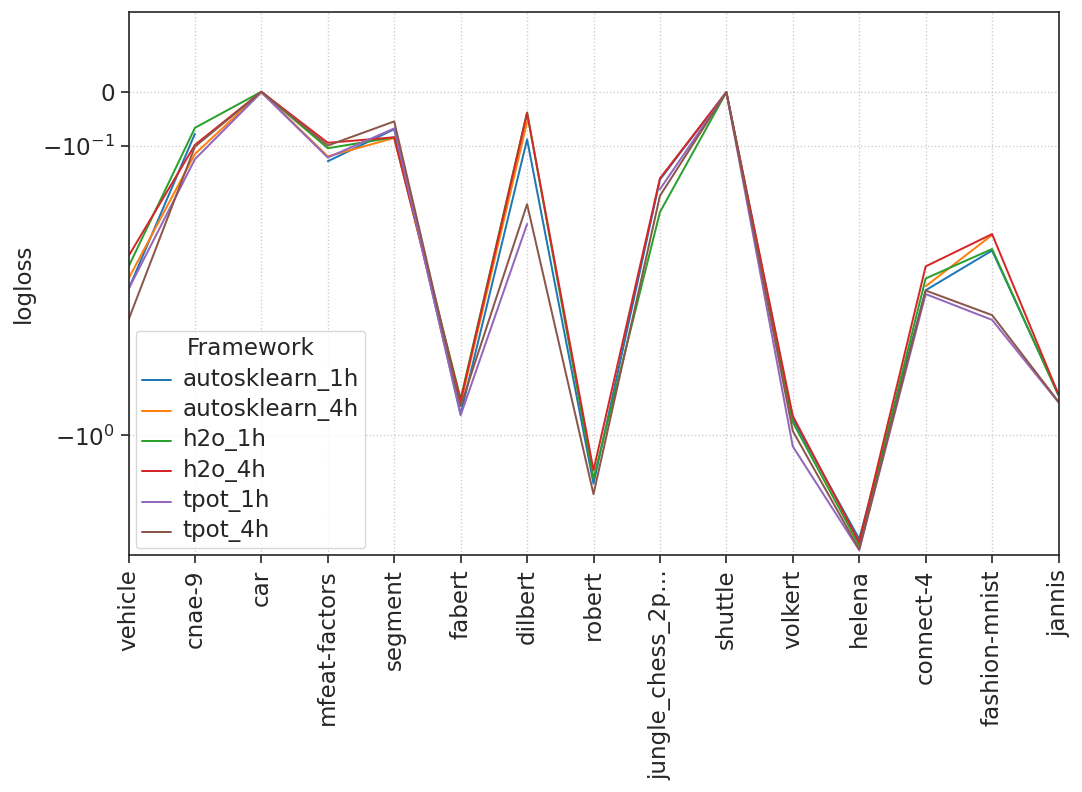

In [21]:
draw_score_parallel_coord('score',
                          results=all_res,
                          type_filter='multiclass', 
                          metadata=ref_results.metadata,
                          x_sort_by=tasks_sort_by,
                          ylabel=multiclass_score_label,
                          yscale=('symlog', dict(linthreshy=0.5)),
                          legend_loc='lower left',
                         );

In [9]:
draw_score_stripplot('score', 
                     results=all_res.sort_values(by=['framework']),
                     type_filter='binary', 
                     metadata=ref_results.metadata,
                     y_sort_by=tasks_sort_by,
                     title=f"Scores ({binary_score_label}) on {results_group} binary classification problems",
                     xlabel=binary_score_label
                    );

NameError: name 'all_res' is not defined

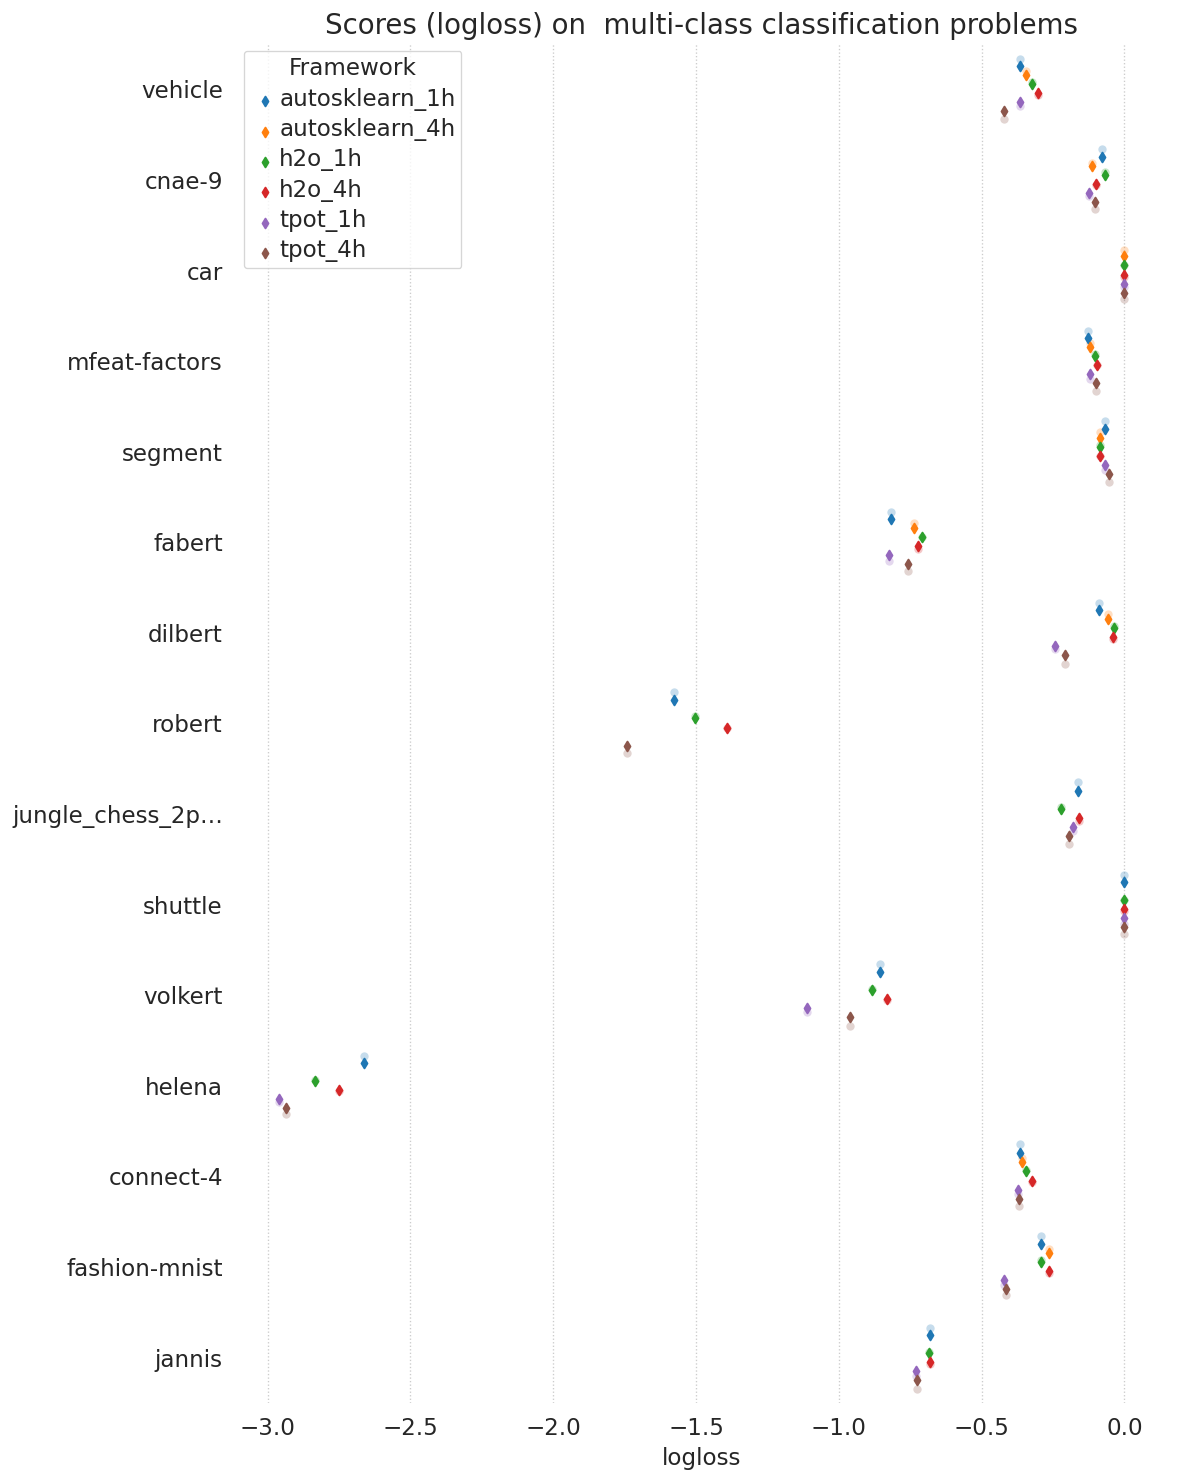

In [30]:
draw_score_stripplot('score', 
                     results=all_res.sort_values(by=['framework']),
                     type_filter='multiclass', 
                     metadata=ref_results.metadata,
                     y_sort_by=tasks_sort_by,
                     title=f"Scores ({multiclass_score_label}) on {results_group} multi-class classification problems",
                     xlabel=multiclass_score_label
                    );

In [22]:
render_summary('result', 
               results=all_res)

In [ ]:
render_summary('models', 
               results=all_res)